In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

Text(0.5, 1.0, 'Image flair')

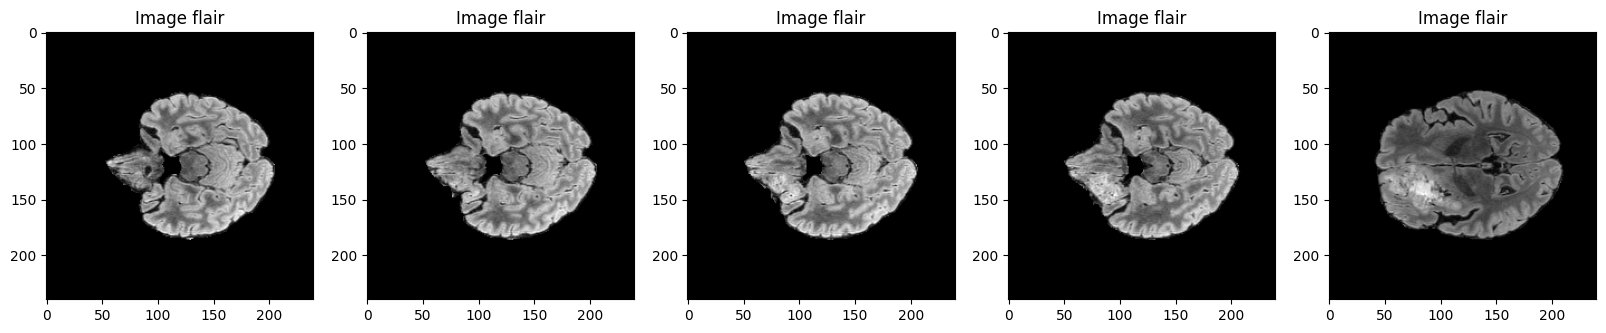

In [ ]:
flair = nib.load('/content/BraTS2021_00000_flair.nii.gz')
seg = nib.load('/content/BraTS2021_00000_seg.nii.gz')
t1 = nib.load('/content/BraTS2021_00000_t1.nii.gz')
t1ce = nib.load('/content/BraTS2021_00000_t1ce.nii.gz')
t2 = nib.load('/content/BraTS2021_00000_t2.nii.gz')

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
slice_w = 25
#ax1.imshow(flair.get_fdata()[:,:,flair.get_fdata().shape[0]//2-slice_w], cmap = 'gray')
#ax1.set_title('Image flair')
ax1.imshow(flair.get_fdata()[:,:,50], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(flair.get_fdata()[:,:,51], cmap = 'gray')
ax2.set_title('Image flair')
ax3.imshow(flair.get_fdata()[:,:,5], cmap = 'gray')
ax3.set_title('Image flair')
ax4.imshow(flair.get_fdata()[:,:,53], cmap = 'gray')
ax4.set_title('Image flair')
ax5.imshow(flair.get_fdata()[:,:,70], cmap = 'gray')
ax5.set_title('Image flair')
# ax2.imshow(t1.get_fdata()[:,:,t1.get_fdata().shape[0]//2-slice_w], cmap = 'gray')
# ax2.set_title('Image t1')
# ax3.imshow(t1ce.get_fdata()[:,:,t1ce.get_fdata().shape[0]//2-slice_w], cmap = 'gray')
# ax3.set_title('Image t1ce')
# ax4.imshow(t2.get_fdata()[:,:,t2.get_fdata().shape[0]//2-slice_w], cmap = 'gray')
# ax4.set_title('Image t2')
# ax5.imshow(seg.get_fdata()[:,:,seg.get_fdata().shape[0]//2-slice_w])
# ax5.set_title('Mask')

In [ ]:
def display_nifti_info(file_path):
    img = nib.load(file_path)
    print("NIfTI Header Information:")
    print(img.header)

display_nifti_info('/content/BraTS2021_00000_flair.nii.gz')

NIfTI Header Information:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0
srow_x          : [-1. -0. -

In [ ]:
flair.get_fdata().shape[0]

240

In [ ]:
flair.get_fdata()[:,:,50][120]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  756., 1214., 1285., 1302., 1253., 1243., 1277., 1156.,
        919.,  815.,  879.,  974., 1069., 1094., 1089., 1066., 1003.,
        944.,  911.,  912.,  900.,  835.,  850.,  858.,  754.,  804.,
        892.,  781.,  809.,  925.,  849.,  755.,  749.,  777.,  711.,
        607.,  614.,  657.,  806.,  932.,  886.,  838.,  797.,  737.,
        665.,  443.,  328.,  494.,  541.,  585.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,  490.,  686.,  578.,  535.,  559.,
        591.,  562.,

In [ ]:
import nibabel as nib

# Load the NIfTI file
img = nib.load('/content/BraTS2021_00000_flair.nii.gz')

# Convert the image object to a numpy array
brain_image = img.get_fdata()

Getting stereographic projection.

In [ ]:
import numpy as np
from skimage import filters
from skimage import measure


def segment_brain(brain_image, threshold):
    # Apply a threshold to binarize the image
    segmented_brain = brain_image > threshold
    return segmented_brain


def extract_surface_points(segmented_brain):
    # Extract surface points using marching cubes algorithm
    vertices, faces, normals, values = measure.marching_cubes(segmented_brain, level=0)
    return vertices,faces



threshold = 0.5
segmented_brain = segment_brain(brain_image, threshold)

# Extract surface points from the segmented brain region
vertices,faces = extract_surface_points(segmented_brain)
print(vertices)
print(faces)

[[ 51. 130.  64.]
 [ 52. 130.  63.]
 [ 52. 129.  64.]
 ...
 [188. 144.  61.]
 [188. 144.  62.]
 [188. 145.  62.]]
[[     2      1      0]
 [     4      3      0]
 [     0      3      2]
 ...
 [112412 112673 112672]
 [112673 112436 112425]
 [112436 112673 112427]]


In [ ]:
pip install tetgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 7.8 MB/s eta 0:00:00


In [ ]:
pip install pyvista

In [ ]:
import numpy as np
import tetgen
import pyvista as pv


def generate_tetrahedral_mesh(vertices, faces):

    faces_with_triangles = np.hstack((np.full((faces.shape[0], 1), 3, dtype=int), faces))


    polydata = pv.PolyData(vertices, faces_with_triangles)


    tet = tetgen.TetGen(polydata)


    tet.tetrahedralize(order=1, mindihedral=20, minratio=1.5)

    # Get the tetrahedral mesh
    grid = tet.grid

    # Extract points and cells from the tetrahedral mesh
    tet_vertices = grid.points
    tet_elements = grid.cells.reshape(-1, 5)[:, 1:]

    return tet_vertices, tet_elements


tet_vertices, tet_elements = generate_tetrahedral_mesh(vertices, faces)
print(tet_vertices)

[[ 51.         130.          64.        ]
 [ 52.         129.          65.        ]
 [ 51.         130.          65.        ]
 ...
 [119.51938284 144.43672484 138.04721512]
 [122.29594437 145.89838014 141.19186218]
 [123.14832364 145.38106206 141.46146805]]


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# vertices = [] # List of vertices
# tet_vertices = []
# face_vertices = []

# Creating a density map
def create_custom_density_map(vertices, grid_size=20, cmap='viridis'):
    # Extract x, y, and z coordinates from the vertices
    x, y, z = zip(*vertices)

    # Create a 3D histogram (density map)
    density_map, _ = np.histogramdd((x, y, z), bins=(grid_size, grid_size, grid_size), density=True)

    return density_map

density_map = create_custom_density_map(vertices)
print(density_map)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
from scipy.interpolate import interpn

def predict_density_at_vertex(vertex):
    # Extract x, y, and z coordinates from the vertices
    x, y, z = zip(*tet_vertices)

    # Determine the number of points along each dimension
    num_points_x = len(set(x))
    num_points_y = len(set(y))
    num_points_z = len(set(z))

    # Create a tuple of arrays containing coordinates for interpolation
    coords = (np.linspace(min(x), max(x), num_points_x),
              np.linspace(min(y), max(y), num_points_y),
              np.linspace(min(z), max(z), num_points_z))

    # Interpolate the density at the specified vertex using trilinear interpolation
    predicted_density = interpn(coords, density_map, vertex, method='linear', bounds_error=False, fill_value=None)

    return predicted_density[0]

# Example usage
print(predict_density_at_vertex((12, 21, 30)))

ValueError: There are 138 points and 20 values in dimension 0

In [ ]:
print(tet_vertices.shape)
print(density_map.shape)

(151620, 3)
(20, 20, 20)


In [ ]:
def density_tet(tet_vertices):
    density = 0
    for vertex in tet_vertices:
        density += predict_density_at_vertex(vertex)/4

    return density

def predict_density_at_vertex(vertex):
    # Interpolate the density at the specified vertex using trilinear interpolation
    predicted_density = interpn(coords.T, density_map.T, vertex, method='linear', bounds_error=False, fill_value=None)

    return predicted_density[0]

ValueError: There are 138 points and 20 values in dimension 0

In [ ]:
# Calculating tetrahedral volume
def tetrahedron_volume(vertices):
    A, B, C, D = vertices

    # Vectors AB, CD, and CB
    vector_AB = np.array(B) - np.array(A)
    vector_CD = np.array(D) - np.array(C)
    vector_CB = np.array(B) - np.array(C)

    # Cross product of CD and CB
    cross_product = np.cross(vector_CD, vector_CB)

    # Dot product of AB and the cross product
    dot_product = np.dot(vector_AB, cross_product)

    # Volume calculation
    volume = abs(dot_product) / 6.0

    return volume

# Calculating face volume
def triangle_area(vertices):
    x1, y1 = vertices[0]
    x2, y2 = vertices[1]
    x3, y3 = vertices[2]

    area = 0.5 * abs(x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))

    return area

In [ ]:
# Local mass function
def local_mass(vertex):
  for tet_vertex in tet_vertices:
    if vertex in tet_vertex:
      volume = tetrahedron_volume(tet_vertex)
      return (predict_density_at_vertex(vertex) * volume)/4

# Local area measure
def local_area(vertex):
  for face_vertex in faces:
    if vertex in face_vertex:
      area = triangle_area(vertex)
      return (predict_density_at_vertex(vertex) * area)/3

In [ ]:
# Create initial spherical area-measure-preserving map
def g(vertex):
  # Return (g1, g2, g3)
  pass

In [ ]:
n = len(vertices)
h = []
for vertice in vertices:
  g1 = vertice[1]
  g2 = vertice[2]
  g3 = vertice[3]
  h_i = g1/(1-(g3)**3) + (g2/(1-(g3)**3))*1j

In [ ]:
r = 1.2
lam = 1

In [ ]:
def convergent():
  # Convergence definition
  pass

In [ ]:
def stereographic_inversion(h):
  # Perform stereographic inversion to get back the g values
  pass

In [ ]:
while not convergent():
  # Updating h
  diag = np.diag(h)
  inverse = np.linalg.inv(diag)
  squared = np.dot(inverse, inverse)
  h = np.dot(squared, h)

  # Determining I and B
  I  = []
  B = []
  for i in range(len(h)):
    if abs(h[i]) < r:
      I.append(i)

  for num in range(n):
    if num not in I:
      B.append(num)

  # Solving the linear equation


  # Stereographic inversion

In [ ]:
def create_R(vertex):
  # How is R defined
  # Return list of all possible matrices R
  pass

In [ ]:
import math
def euclidean_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)

    distance = np.linalg.norm(point2 - point1)

    return distance**2

min_R = float('inf')
opt_R = None
sum_R = 0

for R in create_R:
  for vertex in vertices:
    g = g(vertex)
    sum_R += (euclidean_distance(R(g), vertex))*local_area(vertex)
  if sum_R < min_R:
    min_R = sum_R
    opt_R = R

def update_g(R):
  # Given optimal R, update G
  pass